In [1]:
!pip install wordcloud

In [2]:
!pip install gensim

In [73]:
!pip install pyLDAvis

ERROR: Exception:
Traceback (most recent call last):
  File "D:\Users\same\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'pyldavis'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Users\same\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "D:\Users\same\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "D:\Users\same\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "D:\Users\same\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "D:\Users\same\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "D:\Users\same\anaconda3\lib\socket

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from extract_dataframe import read_json
from extract_dataframe import TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import pandas as pd
import statistics
import string

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
# import pyLDAvis.gensim
# import pyLDAvis




class Explore_Data:
    def __init__(self, df:pd.DataFrame):
        self.df = df
    def generate_word_cloud(self)->None:
        data=self.df.loc[self.df['lang'] =="en"]
        data['clean_text']=data['clean_text'].astype(str)
        data['clean_text'] = data['clean_text'].apply(lambda x: x.lower())
        data['clean_text']= data['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
        plt.figure(figsize=(20, 10))
        plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(data.clean_text.values)))
        plt.axis('off')
        plt.title('Most Frequent Words In Our Tweets',fontsize=16)
        plt.show()
        return
    def generate_lang_chart(self)->None:
        tweets_by_lang = self.df['lang'].value_counts()
        fig, ax = plt.subplots()
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.set_xlabel('Languages', fontsize=10)
        ax.set_ylabel('Number of tweets' , fontsize=10)
        ax.set_title('Top 5 languages', fontsize=10)
        tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')
    def generate_users_bar_chart(self)->None:
        tweets_by_lang = self.df['original_author'].value_counts()
        fig, ax = plt.subplots()
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.set_xlabel('Users', fontsize=10)
        ax.set_ylabel('Number of tweets' , fontsize=10)
        ax.set_title('Top 20 users', fontsize=10)
        tweets_by_lang[:20].plot(ax=ax, kind='bar', color='orange')
        return
        
    def generate_hashtag_chart(self)->None:
        data=self.df
        hashtags_list_df = data.loc[
        data.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
        flattened_hashtags_df = pd.DataFrame(
            [hashtag for hashtags_list in hashtags_list_df.hashtags
            for hashtag in hashtags_list],
            columns=['hashtag'])
        # To plot Top 20 Hashtags
        data["flattened_hashtags"]= flattened_hashtags_df
        data['flattened_hashtags'].value_counts()[:20].plot(kind='bar')
        
    def generate_retweet_chart(self)->None:
        data=self.df
        tweets_by_retweet = self.df['retweet_count'].value_counts()
        fig, ax = plt.subplots()
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.set_xlabel('Tweets', fontsize=10)
        ax.set_ylabel('Number of retweets' , fontsize=10)
        ax.set_title('Distribution of retweets', fontsize=10)
        tweets_by_retweet[0:30].plot(ax=ax, kind='bar', color='orange')
        return


ModuleNotFoundError: No module named 'extract_dataframe'

In [79]:
_, tweet_list = read_json("data/covid19.json")
tweet = TweetDfExtractor(tweet_list)
tweet_df = tweet.get_tweet_df() 
clean_tweets=Clean_Tweets(tweet_df)
clean_df= clean_tweets.clean_hashtags(tweet_df)
clean_df= clean_tweets.remove_mentions_from_frame(clean_df)  
clean_df= clean_tweets.remove_hastags_from_tweet(clean_df)
clean_df=clean_tweets.convert_to_str(clean_df)
clean_df= clean_tweets.convert_to_lists(clean_df)


# listed.head(5)["hashtags"]

explore=Explore_Data(clean_df)




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Users\same\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-79-b3ad5de6cde1>", line 1, in <module>
    _, tweet_list = read_json("data/covid19.json")
  File "D:\same\Documents\10 Acadamy\Exercises\Wed\extract_dataframe.py", line 23, in read_json
    for tweets in open(json_file_path,'r'):
  File "D:\Users\same\anaconda3\lib\encodings\cp1252.py", line 22, in decode
    def decode(self, input, final=False):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Users\same\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceba

TypeError: object of type 'NoneType' has no len()

In [76]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            3720 non-null   float64
 4   subjectivity        3720 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      4785 non-null   float64
 7   retweet_count       6532 non-null   int64  
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  1518 non-null   object 
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
 15  clean_text          6532 non-null   object 
dtypes: flo

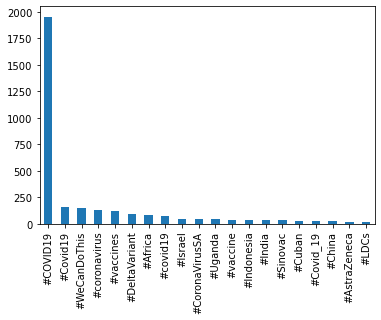

In [5]:
explore.generate_hashtag_chart()

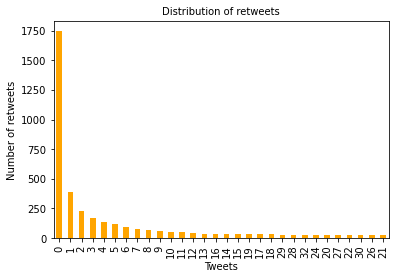

In [6]:
explore.generate_retweet_chart()

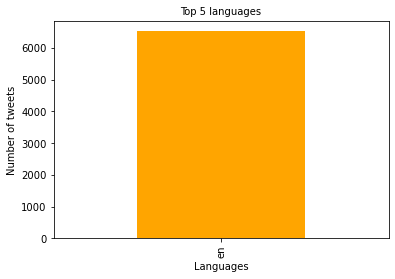

In [80]:
explore.generate_lang_chart()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            3720 non-null   float64
 4   subjectivity        3720 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      4785 non-null   float64
 7   retweet_count       6532 non-null   int64  
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  1518 non-null   object 
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
 15  clean_text          6532 non-null   object 
dtypes: flo

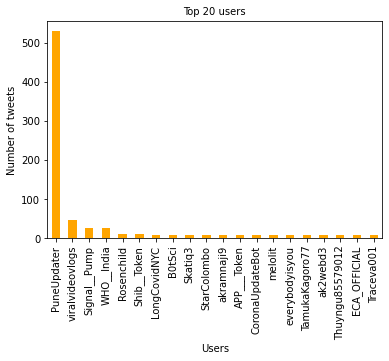

In [81]:
explore.generate_users_bar_chart()

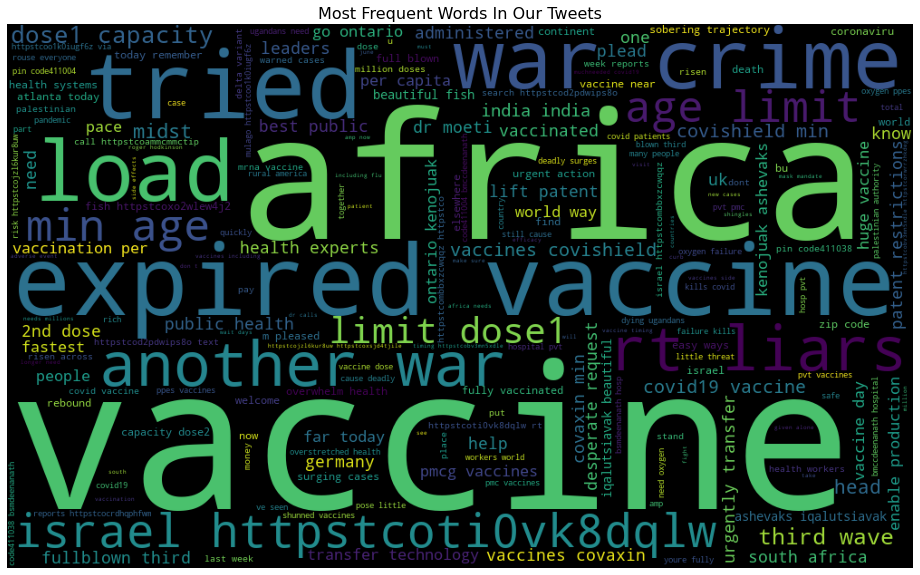

In [7]:
explore.generate_word_cloud()

In [8]:

class PrepareData:
    def __init__(self,df):
        self.df=df
    
    def preprocess_data(self):       
        
        #Converting tweets to list of words For feature engineering
        sentence_list = [tweet for tweet in self.df['clean_text']]
        word_list = [sent.split() for sent in sentence_list]

        #Create dictionary  
        word_to_id = corpora.Dictionary(word_list)
        corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    
        return word_list, word_to_id, corpus_1
    
    
    


In [54]:


PrepareData_obj=PrepareData(clean_df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [55]:
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [4]:
pprint(lda_model.show_topics(formatted=False))

Pretty printing has been turned OFF


In [3]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)

NameError: name 'lda_model' is not defined

In [27]:

class PrepareData2:
    def __init__(self,df):
        self.df=df
    
    def preprocess_data(self):       
        
        #Converting tweets to list of words For feature engineering
        sentence_list = [tweet for tweet in self.df['clean_text']]
        senetence_list_without_stop_words=[remove_stopwords(sent) for sent in sentence_list ]
        word_list = [sent.split() for sent in senetence_list_without_stop_words ]

        #Create dictionary
        word_to_id = corpora.Dictionary(word_list)
        corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    
        return word_list, word_to_id, corpus_1
    

In [28]:

PrepareData_obj=PrepareData2(clean_df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [51]:
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [52]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('vaccines', 0.045994956),
   ('million', 0.023413735),
   ('2021', 0.020206718),
   ('doses', 0.019878438),
   ('provide', 0.018509494),
   ('huge', 0.014905838),
   ('sending', 0.014655917),
   ('1', 0.0144521035),
   ('sent', 0.014358646),
   ('committed', 0.014092606)]),
 (1,
  [('india', 0.091888286),
   ('people', 0.040022492),
   ('help', 0.02948943),
   ('dont', 0.028352337),
   ('wave', 0.026608307),
   ('africa', 0.025310026),
   ('australia', 0.02441575),
   ('risk', 0.019811612),
   ('cases', 0.015756246),
   ('covid19', 0.015569297)]),
 (2,
  [('amp', 0.06817494),
   ('vaccines', 0.043679003),
   ('world', 0.03864151),
   ('need', 0.03814591),
   ('vaccination', 0.034315415),
   ('covid19', 0.03241176),
   ('covid', 0.021928534),
   ('government', 0.019449174),
   ('oxygen', 0.016902097),
   ('today', 0.016394652)]),
 (3,
  [('vaccines', 0.05665834),
   ('age', 0.04314185),
   ('capacity', 0.04122388),
   ('min', 0.039158013),
   ('pin', 0.039158013),
   ('limit', 

In [1]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute 
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)

NameError: name 'lda_model' is not defined

In [ ]:

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared